## Contents of the Notebook:
### Part1: Exploratory Data Analysis(EDA):
1)각 feature 분석

2)feature들 간 관계성 및 경향성 파악

### Part2: Feature Engineering and Data Cleaning:
1)새로운 feature 추가

2)중복되는 feature 제거

3)모델링에 적절한 형태로 feature 변환

### Part3: Predictive Modeling
1)Running Basic Algorithms.

2)Cross Validation.

3)Ensembling.

4)Important Features Extraction.

### Part1: Exploratory Data Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('Titanic/train.csv')

In [3]:
data.head()   # Survived 0: 사망 1: 생존

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()  # total null values 체크하기 위해

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin, Embarked 가 null values 갖고 있음을 알 수 있다. 
null data를 어떻게 채우느냐에 따라 모델의 성능이 좌지우지될 수 있기 때문에 신경을 많이 써야 한다.

#### 몇 명이 생존했는가?

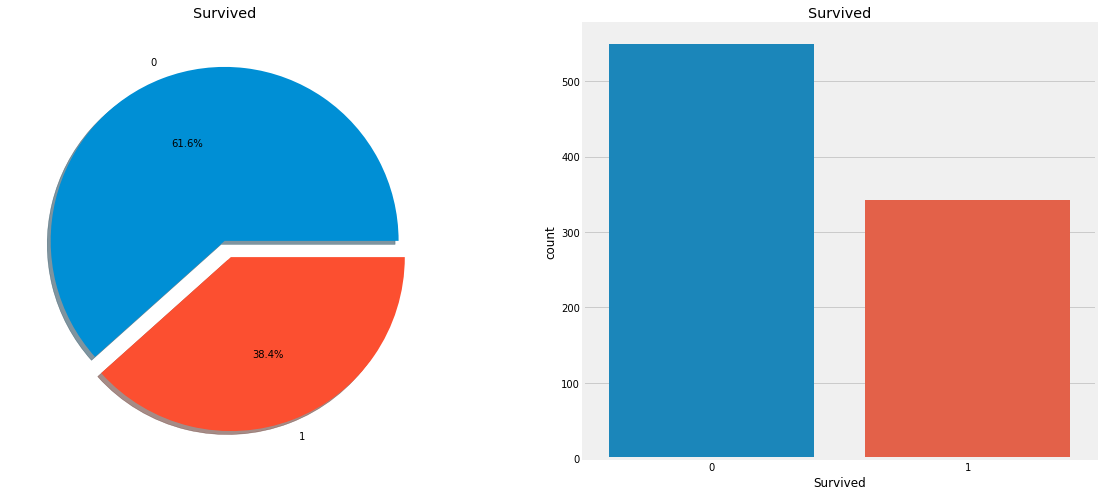

In [5]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

training set의 891명 중 350명 가량만 살았음을 알 수 있다. 전체 training set에서 38.4%만 사고로부터 생존했다. 좀 더 나은 인사이트를 데이터로부터 얻기 위해서 어떤 카테고리들에 해당하는 승객들이 생존 또는 사망했는지 살펴볼 것이다.

데이터셋의 Sex,Port Of Embarcation, Age 등의 각각 다른 feature들을 사용해서 생존율을 알아보자.

그 전에 feature들의 서로 다른 타입을 이해해보자.

### Types of Features

#### 범주형(Categorical Feature):
범주형 데이터란 선택사항이 유한한 집합에 속한 하나 이상의 이산 항목을 표현하는 입력 특성을 가리킨다. 예를 들어 사용자가 성별은 남성과 여성이라는 두 개의 카테고리를 갖고 있는 범주형 변수이다. 우리는 이러한 변수들을 정렬 불가하여 순서를 매길 수 없고 셀 수만 있다. 이들은 명목형 변수(Nominal Variables)라고도 불린다.

Categorical Features in the dataset: Sex,Embarked

#### 서수형(Ordinal Feature):
데이터가 속하는 category들에 순서가 있는 경우 ordinal data라고 한다.(순서가 있는 명목 자료) 예를 들어, Height에 대해 survey를 하는 경우 Tall, Medium, Short이라는 답변으로 디자인할 수 있다. 따라서 Height는 서수형 변수이다. 여기서 우리는 변수를 relative sort 할 수 있다.

Ordinal Features in the dataset: PClass

#### 연속형(Continuous Feature):
featues column 내에서 어떠한 두 지점 또는 최소와 최대값 사이의 값을 사용할 수 있는 경우 이를 연속형이라고 한다.가능한 값이 무한한 범위를 갖는 부동 소수점 특성이다. 불연속 특성과 대비되는 개념이다.

Continuous Features in the dataset: Age

### Analysing the Feature

### Sex → Categorical Feature

In [6]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

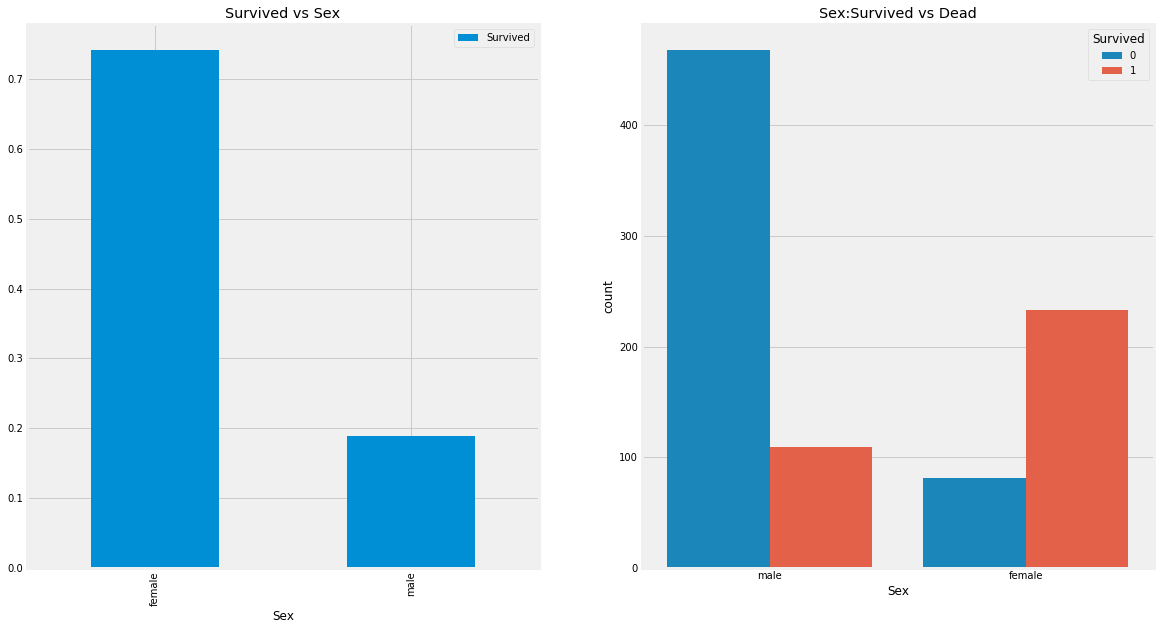

In [7]:
f,ax = plt.subplots(1,2,figsize=(18,10))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data, ax=ax[1]) # hue에 어떤 컬럼을 적으면 그 컬럼을 기준으로 데이터를 쪼갠다
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

선상에 있던 남성의 수는 여성의 수보다 훨씬 더 많다. 여전히 여성 수는 남성 수의 거의 두 배이다. 선박의 여성의 생존율은 약 75 % 인 반면 남성의 생존율은 약 18-19% 이다.

이것은 모델링을 하는 데에 있어 매우 중요한 특징이다. 하지만 이것이 최선일까? 다른 특성들도 체크해보자.

### Pclass → Ordinal Feature

In [8]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


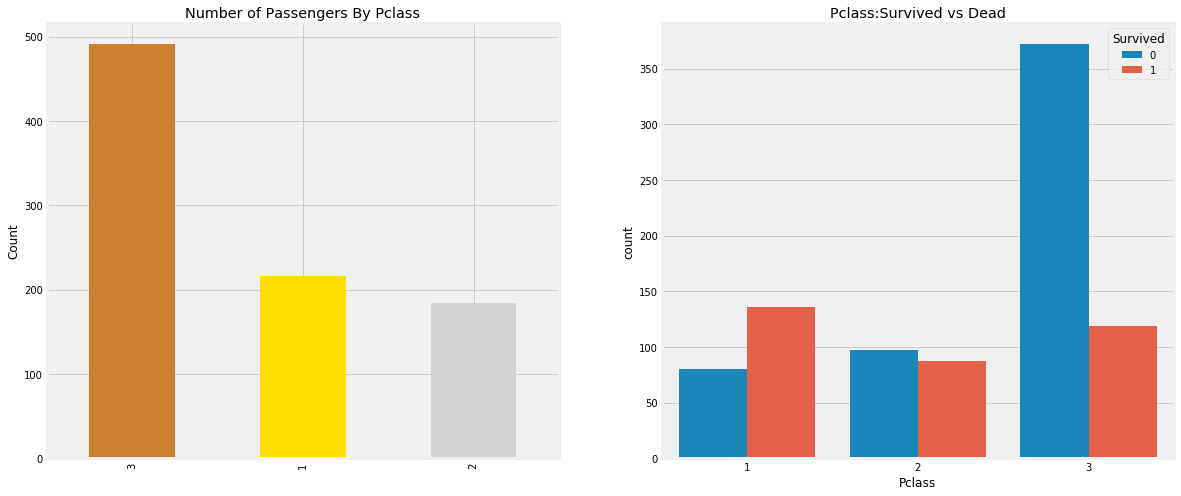

In [9]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

사람들은 돈으로 모든 것을 살 수는 없다고 한다. 하지만 우리는 Pclass 1의 승객들이 매우 높은 확률로 구조되었음을 알 수 있다. 비록 Pclass3 승객의 수가 더 많지만, 그들의 생존률은 25% 가량으로 매우 낮다.

Pclass 1의 생존률은 63% 인 반면, Pclass 2의 생존률은 48% 정도이다. 따라서 돈과 지위는 중요하다는 결론이 나온다.

다음으로는 Sex와 Pclass를 연관지어 이에 대한 생존률을 살펴보자.

In [10]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

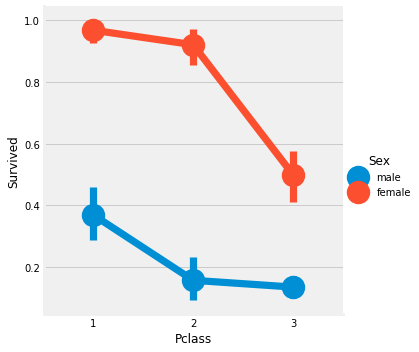

In [11]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

이 경우 FactorPlot을 이용한다. 범주형 변수들의 분리를 쉽게 하기 때문이다.

CrossTab 과 FactorPlot을 통해 Pclass1 여성 94명 중 3명이 사망했으므로  Pclass1 여성의 생존률은 95-96% 임을 쉽게 추측할 수 있다.

객실 등급에 관계없이 여성은 우선적으로 구조되었다는 것은 분명하다.
Pclass1 남성은 매우 낮은 생존률을 보이기 때문이다.

따라서 객실 등급 또한 중요한 특성인 것을 알 수 있다. 다른 특성들도 분석해보자.

### Age → Continuous Feature

In [12]:
print('최고령 승객 나이: ', data['Age'].max(),'세')
print('최연소 승객 나이: ', data['Age'].min(),'세')
print('평균 나이: ', data['Age'].mean(),'세')

최고령 승객 나이:  80.0 세
최연소 승객 나이:  0.42 세
평균 나이:  29.69911764705882 세


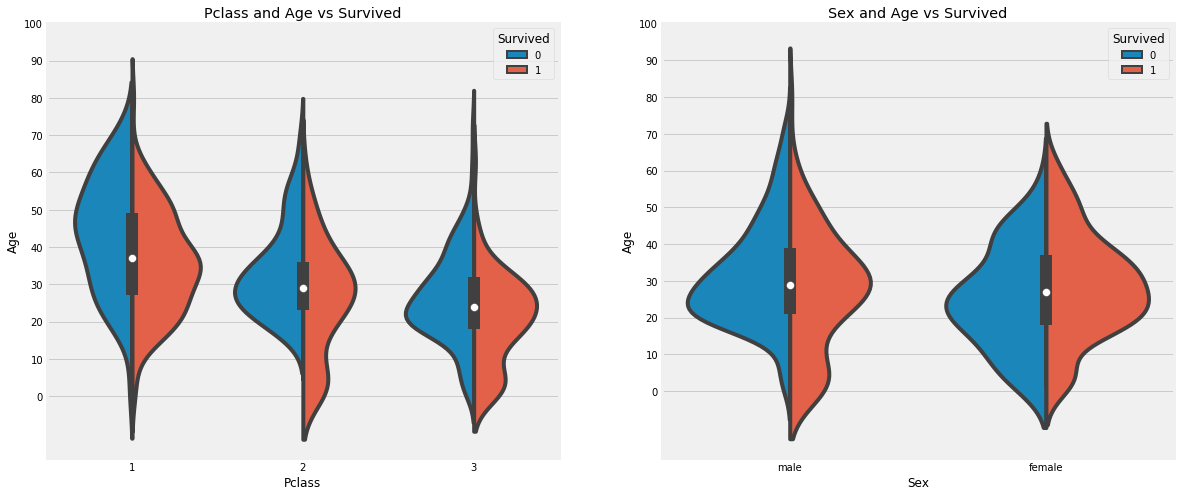

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex','Age',hue='Survived',data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

관찰 결과 :

1) Pclass에 따라 어린이 수가 증가하고 10 세 미만의 어린이의 생존율은 Pclass에 상관없이 양호해 보인다.

2) Pclass1에서 20-50 세의 Passeneger의 생존 가능성은 높고 여성은 더 높게 나타난다.

3) 남성의 경우 생존 확률은 나이가 증가함에 따라 감소한다.

앞에서 보았듯이, Age 는 177개의 null값을 갖는다. 이 NaN 값들을 대체하기 위해 우리는 dataset의 평균 나이를 이에 할당할 수 있다.

문제는, 다양한 나이대의 많은 사람들이 있다는 것이다. 우리는 4살짜리에게 평균 나이인 29살을 부여할 수는 없다. 승객이 어떤 나이대에 있는지 알 수 있는 방법은 없을까?

우리는 Name feature를 체크할 수 있다. 이 feature를 살펴보며 우리는 그 이름들의 Mr 또는 Mrs 같은 호칭을 통해 Mr와 Mrs의 평균값을 각 그룹에 할당할 수 있다.

In [14]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') # 호칭 추출

여기서 우리는 정규표현식:[A-Za-z]+). 를 이용할 것이다. 따라서 A-Z or a-z 사이에 있고 .(점)이 오는 문자열을 찾아서 이름에서 이니셜을 추출한다.

In [15]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') # 성별에 따른 이니셜 체크

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Mlle이나 Mme과 같이 맞춤법이 틀린 몇몇 이니셜은 Miss를 의미한다. 이를 Miss로 바꾸고 다른 값에 대해서도 마찬가지로 대체해준다.

In [16]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)  #inplace=True 라는 인자 추가하여 반환받지 않고서도 기존의 dataframe이 변경되도록 함

In [17]:
data.groupby('Initial')['Age'].mean()  # 이니셜로 평균 나이 확인

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### NaN 나이 채워넣기

In [18]:
# 평균 연령의 Ceil 값으로 NaN 값 할당
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [19]:
data.Age.isnull().any()  # null값 남아있는지 확인

False

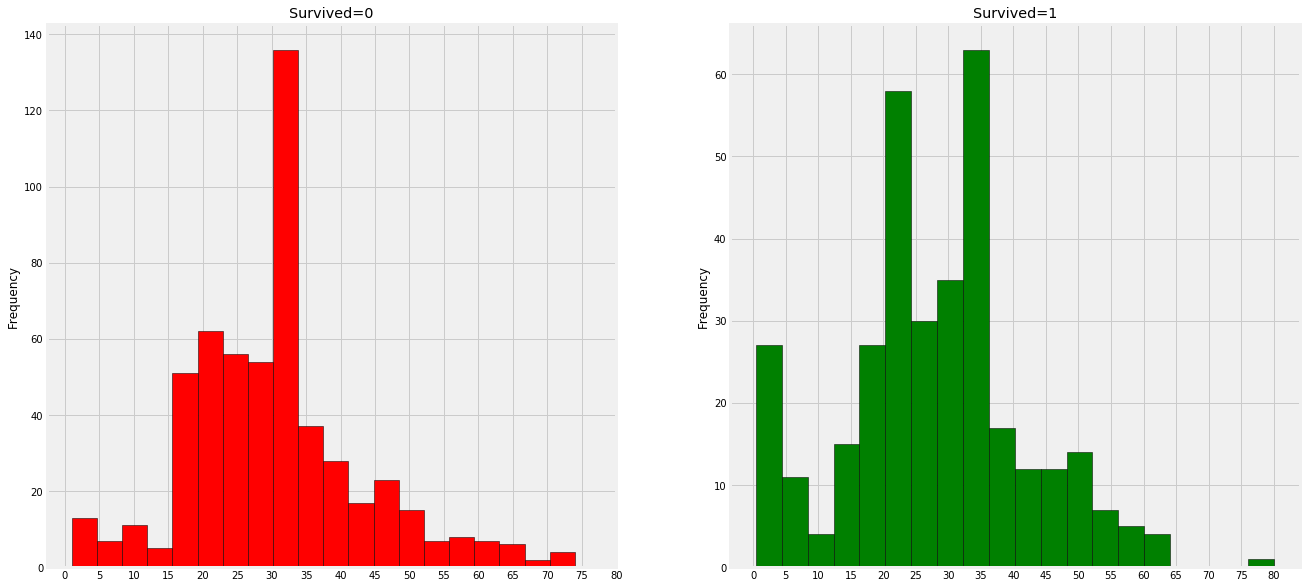

In [20]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived=0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived=1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

관찰 결과:

1) 5세 미만의 유아들이 다수 구출되었다.(여성과 아이 우선 정책)

2) 최고령 승객이 구출되었다.(80세)

3) 최대 사망자 수는 30-40세 연령대에 있다.

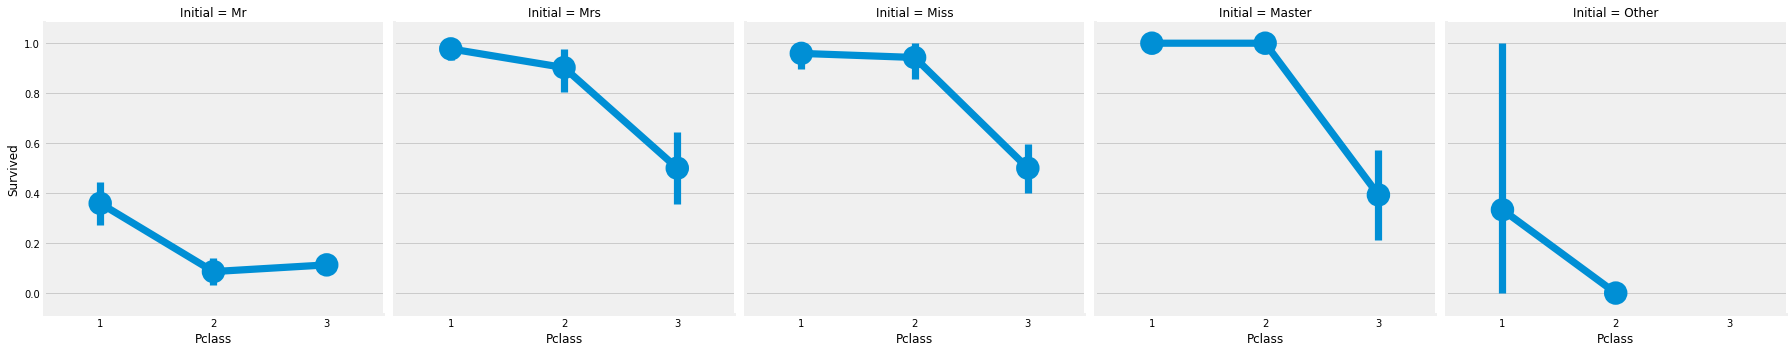

In [21]:
sns.factorplot('Pclass','Survived', col='Initial',data=data)
plt.show()

여성과 아이 우선 정책은 등급에 상관없이 이루어졌음을 알 수 있다.

### Embarked → Categorical Value

In [22]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')
# 탑승한 곳 : C(cherbourg),Q(Queenstown),S(Southampton)

#### 탑승 항구에 따른 생존 확률

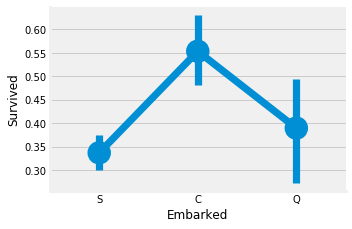

In [23]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

C 항구의 생존 확률이 0.55 정도로 가장 높은 반면, S 항구는 가장 낮다.

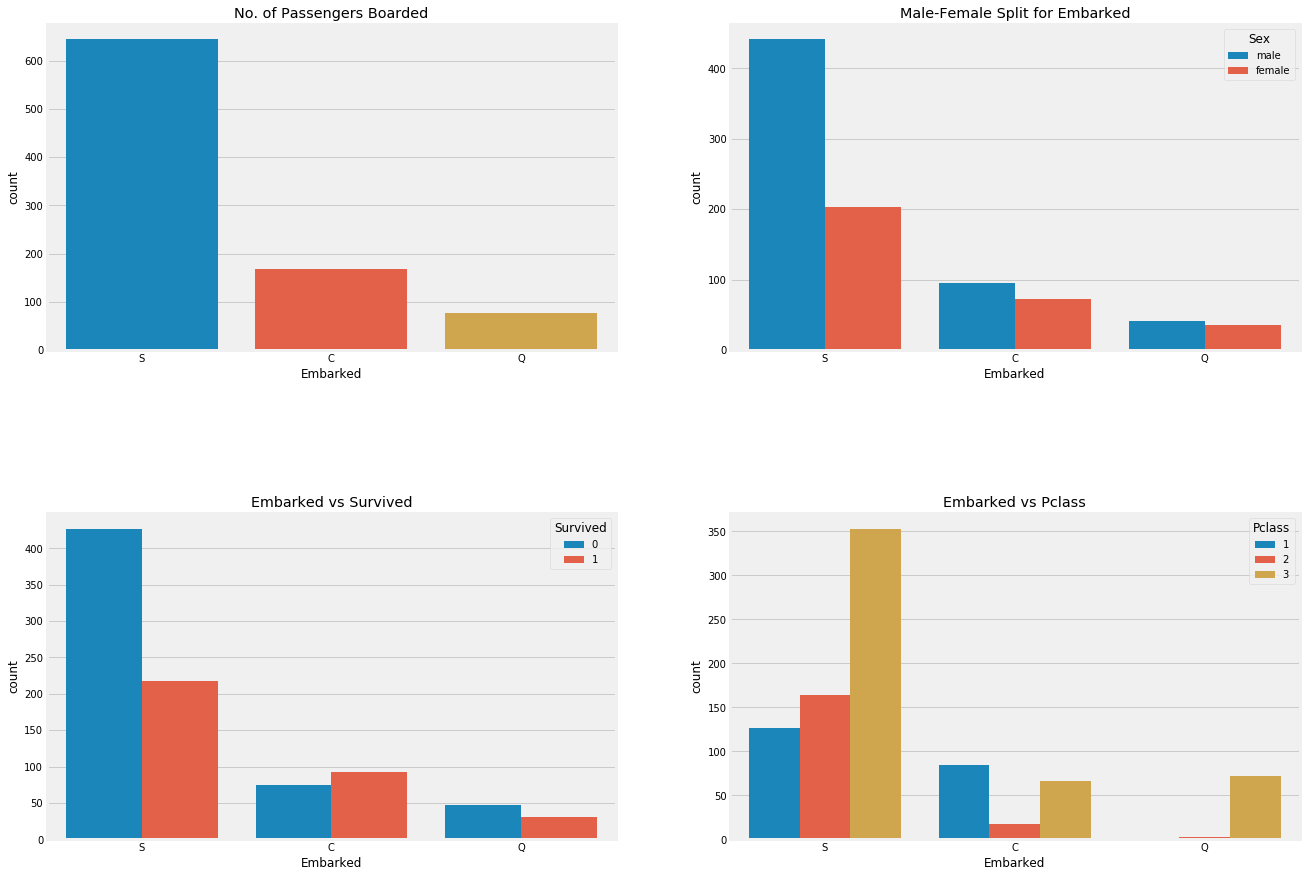

In [24]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

관찰 결과:

1) S에서 가장 많은 승객들이 탑승했다. 그 중 대다수는 Pclass3 이다.

2) C에서 탄 승객들은 좋은 생존 비율을 보인다. 아마 Pclass1과 Pclass2 승객들이 구조되었기 때문일 것이다.

3) S 항구는 부유한 사람들의 대다수가 탑승한 곳으로 보여진다. 비록 여기서 생존 확률은 낮아 보이지만, 그 이유는 약 81% 의 Pclass3 승객들이 살아남지 못했기 때문일 것이다.

4) Q 항구에서 탑승한 승객들의 95% 가량이 Pclass3이다. 

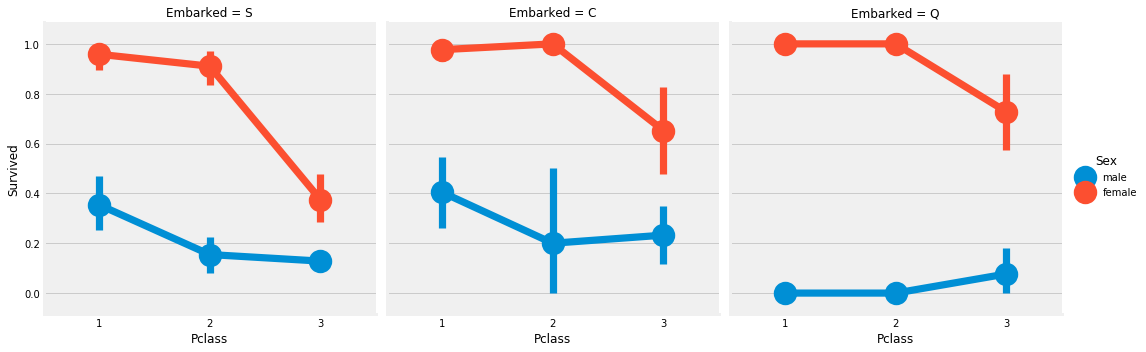

In [25]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

관찰 결과:

1) Pclass에 관계없이 Pclass1과 Pclass2 여성의 생존 확률은 1에 가깝다.

2) S항구 Pclass3 승객들의 생존율은 남녀 모두에서 낮게 나타났다.(돈의 문제)

3) Q항구는 대부분이 Pclass3 승객이었기 때문에 남성에게 있어서 생존율이 좋지 않다.

#### Embarked NaN 채워넣기

가장 많은 승객들이 S 항구에서 탑승했으므로, NaN을 S 로 대체할 것이다.

In [26]:
data['Embarked'].fillna('S',inplace=True)

In [27]:
data.Embarked.isnull().any()   # NaN 값 남아있는지 확인

False

### SibSip → Discrete Feature

이 feature는 어떤 사람이 혼자인지 그의 가족들과 함께인지를 나타낸다.

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife

In [28]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


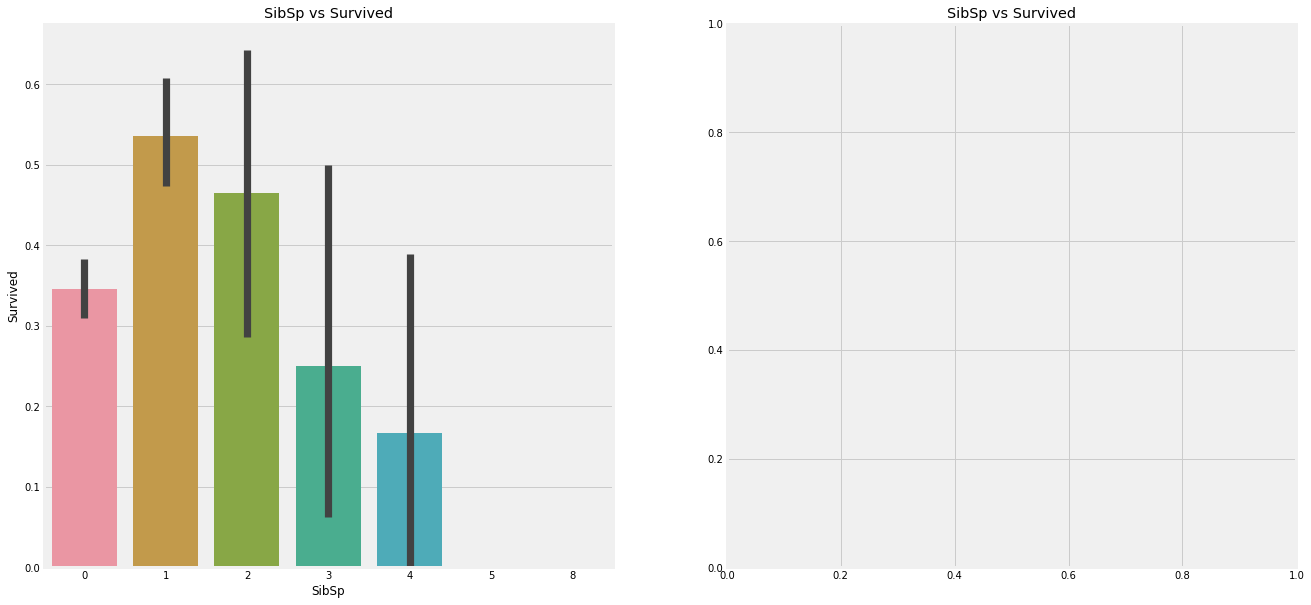

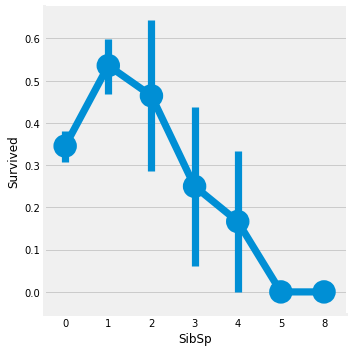

In [29]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
#plt.close(2)
plt.show()

In [30]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


관찰 결과:

barplot과 factorplot을 통해 승객이 형제자매 없이 홀로 탑승했으면, 그는 34.5%의 생존률을 가짐을 알 수 있다. 그래프는 형제자매의 수가 증가하면 감소하는 추세이다. 이는 타당한 이유가 된다. 내가 만약 가족과 함께 탑승했다면, 나는 나보다 가족을 먼저 구하려고 할 것이다. 놀랍게도 5-8명 가족의 생존률은 0% 이다. 그 이유는 아마도 객실 등급때문일까?

객실 등급이 이유이다. crosstab은 SibSp가 4 이상인 사람은 모두 Pclass3 에 있었음을 보여준다. 이는 4명 이상인 Pclass3 의 대가족은 모두 죽었다고 봐도 된다.

### Parch (Parents, Children) : 함께 탑승한 부모, 아이의 수

In [31]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


crosstab은 대가족이 Pclass3에 있었음을 다시 한 번 보여준다.

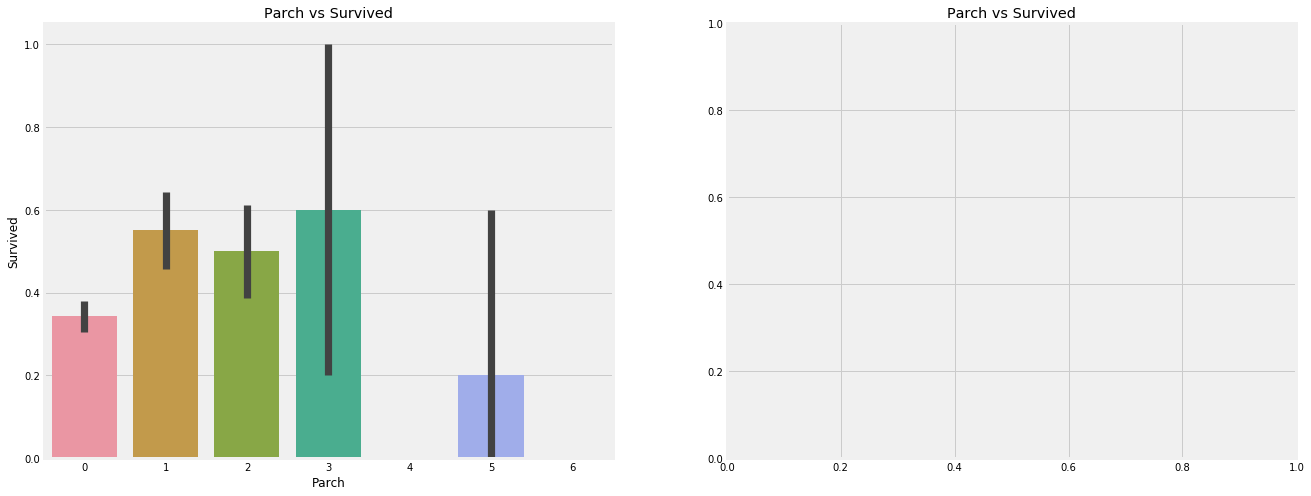

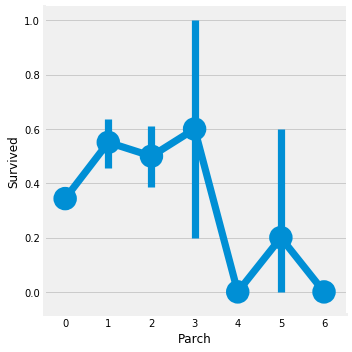

In [32]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
#plt.close(2)
plt.show()

관찰 결과:

여기서의 결과도 꽤 유사하다. 부모와 함께 탑승한 승객들은 보다 높은 생존 확률을 갖고 있다.그러나 이는 그 숫자가 올라감에 따라 감소한다.

선상에 1-3명의 부모가 있던 사람은 생존 확률이 좋았다. 홀로 있던 것은 치명적이었으며 생존 확률은 선상에 4명보다 많은 부모가 있는 사람에게서 낮게 나타났다.

### Fare → Continuous Feature

In [33]:
print('최고 운항비는:',data['Fare'].max())
print('최저 운항비는:',data['Fare'].min())
print('평균 운항비는:',data['Fare'].mean())

최고 운항비는: 512.3292
최저 운항비는: 0.0
평균 운항비는: 32.2042079685746


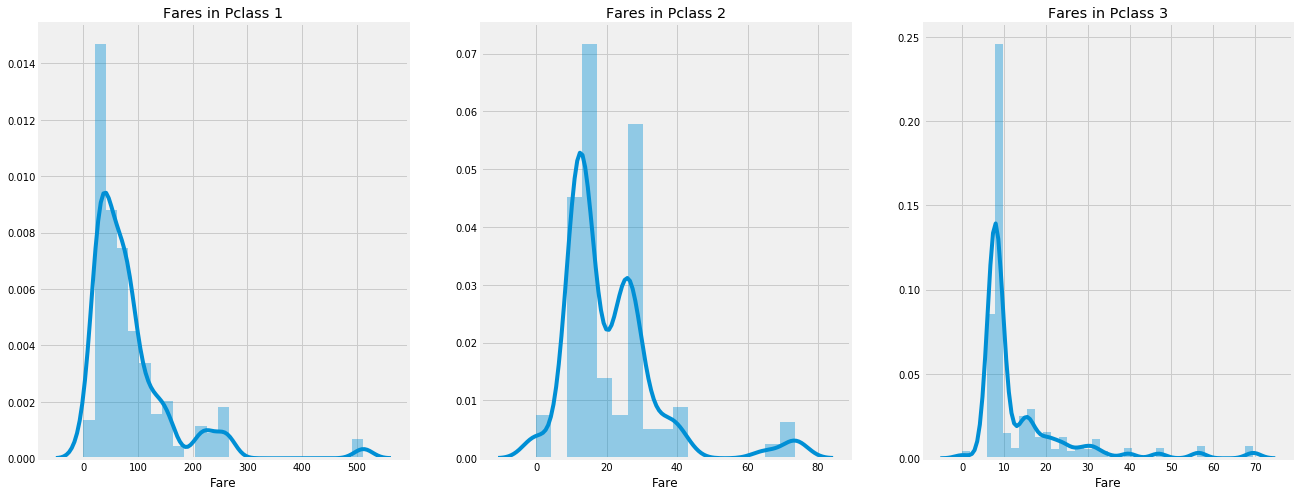

In [34]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

Pclass1 승객 운항비의 분포가 가장 큰 것 같아보이며, 이 분포는 표준값이 감소함에 따라 감소한다. 또한 이는 연속적이므로, binning 을 사용하여 이를 이산적 변수로 변환시킬 수 있다.

### 모든 feature들에 대한 간략한 고찰:

Sex : 여성의 생존 확률은 남성에 비해 높다.

Pclass : 1st class 승객이 좋은 생존 가능성을 보여주는 추세가 있다. Pclass3의 생존률은 매우 낮다. 여성에 있어서는, Pclass1의 생존 가능성이 거의 1이며 Pclass2 또한 매우 높다. 돈이 최고다..!

Age : 5-10세 미만의 아이들은 높은 생존 가능성을 갖는다. 15-35세 연령대의 승객들이 많이 사망했다.

Embarked : 매우 흥미로운 feature이다. C에서의 생존 가능성은 S에서의 Pclass1 승객 대다수보다도 높아 보인다. Q에서의 승객들은 모두 Pclass3이다.

Parch + SibSp: 혼자 탑승하거나 대가족인 사람에 비해 1-2명의 형제자매, 배우자 또는 1-3명의 부모님이 탑승한 사람은 높은 생존 가능성을 보여주었다.

### Feature들 간 상관관계

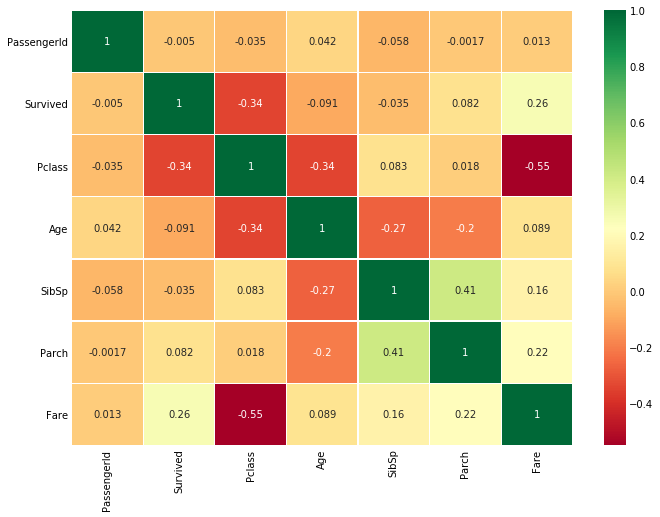

In [35]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
# data.corr() --> correlation matrix
fig=plt.gcf()    # gcf() : Get a regerence to the Current Figure
fig.set_size_inches(10,8)   # 사이즈 조절
plt.show()

#### Heatmap 해석하기

가장 먼저 알아두어야 할 것은 알파벳이나 문자열을 서로 연관시킬 수 없다는 것이 명백하기 때문에 숫자 feature 들만 비교한다는 것이다. plot을 이해하기 전에, 상관관계가 무엇인지 살펴보자.

**양의 상관관계(Positive Correlation) : feature A가 증가할 때 feature B가 증가하는 것을 양의 상관관계에 있다고 한다. 1은 완전한 양의 상관관계를 의미한다.**

**음의 상관관계(Negative Correlation) : feature A가 증가할 때 feature B는 감소하는 것을 음의 상관관계에 있다고 한다. -1은 완전한 음의 상관관계를 의미한다.**

두 개의 feature가 높거나 완전한 상관관계가 있을 때, 하나의 증가는 나머지 하나를 증가하게끔 한다. 이는 두 feature들이 매우 유사한 정보를 포함하고 있으며 정보의 차이가 거의 없거나 전혀 없음을 의미한다. 둘 다 거의 동일한 정보를 포함하므로 이를 다중 선형성이라고 한다.

따라서 모델을 만들거나 훈련하는 동안 훈련 시간과 많은 이점을 줄이는 feature들 간 중복 기능을 제거해야 한다.

위의 히트맵에서 feature들이 서로 큰 관련이 없음을 알 수 있다. 가장 높은 상관관계는 SibSp와 Parch의 0.41이다. 따라서 우리는 모든 feature들을 계속 사용가능하다.

### Part2: Feature Engineering and Data Cleaning

Feature Engineering이란 무엇인가?

우리가 feature들이 포함된 dataset을 받았을 때, 모든 feature들이 중요하진 않을 것이다. 제거되어야할 중복 feature들이 많이 있을 것이다. 또한 우리는 다른 feature들로부터 정보를 관찰하고 추출함으로써 새로운 feature들은 얻고 추가할 수 있다.

Name Feature를 이용한 Initials Feature를 얻는 것을 예로 들 수 있다. 우리가 어떤 새로운 feature를 얻고 몇 개는 제거 가능한지 알아보자. 또한 우리는 Predictive Modeling을 위해 존재하고 있는 관련 feature들은 적절한 형태로 변환시킬 수 있다.

Feature Engineering은 머신러닝 알고리즘을 작동하기 위해 데이터에 대한 도메인 지식을 활용하여 특징(Feature)를 만들어내는 과정이다. 다른 정의를 살펴보면, 머신러닝 모델을 위한 데이터 테이블의 컬럼(특징)을 생성하거나 선택하는 작업을 의미한다. Feature Engineering은 모델 성능에 미치는 영향이 크기 때문에 머신러닝 응용에 있어서 굉장히 중요한 단계이며, 전문성과 시간과 비용이 많이 드는 작업이다.

### Age_band

#### Age Feature 관련 문제:
Age는 연속적 feature인데, 연속 변수는 머신러닝 모델에서 문제가 된다.

Eg: 만약 스포츠인들을 성별로 그룹화하거나 정렬한다면, 우리는 그들을 쉽게 남성과 여성으로 구분할 수 있다.

만약 그들의 나이로 그룹화한다면, 어떻게 해야 할까? 그들이 30명이라면, 30개의 나이 변수들이 있을 것이다. 이것이 문제가 된다.

우리는 Binning 또는 Normalisation(정규화) 을 이용하여 이러한 연속 변수를 카테고리 변수로 전환시켜야 한다. 여기서는 binning을 사용할 것이다. 즉, 연령 범위를 단일 bin으로 그룹화하거나 단일 값을 할당할 것이다.

최고령 승객의 나이는 80세였다. 그러므로 0-80 범위를 5개의 bin으로 나누자. 80/5=16 이므로 bin의 사이즈는 16이다.

In [36]:
data['Age_band']=0
data.loc[data['Age']<=16, 'Age_band']=0  # data['Age']<=16인 행까지 Age_band 값을 출력
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64, 'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [37]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')
# 각 연령대 그룹별 승객 수 확인

,Age_band
1,382
2,325
0,104
3,69
4,11


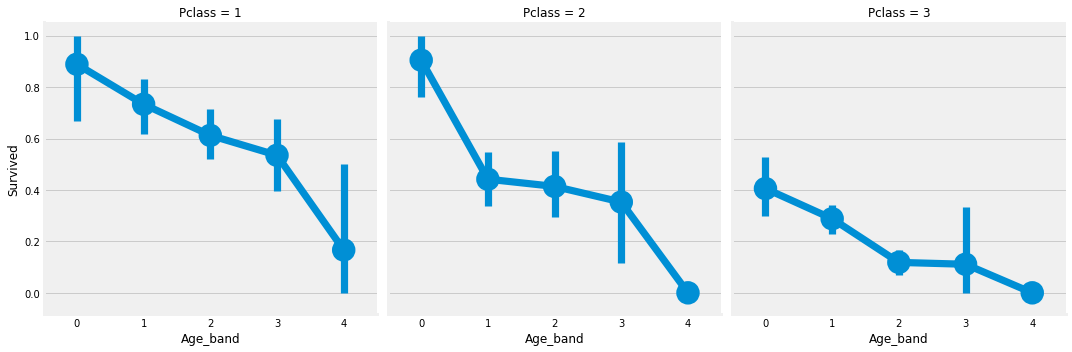

In [38]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

생존율은 연령이 증가함에 따라 객실등급에 관계없이 감소한다.

### Family_Size and Alone

이 지점에서, 우리는 'Family_Size' 와 'Alone' 이라는 새로운 feature를 생성하고 분석할 수 있다. 이 feature는 Parch와 SibSp의 요약판이다. 이는 생존율이 승객의 가족 규모와 관련이 있는지 확인할 수 있도록 결합된 데이터를 제공한다. Alone은 승객인 혼자인지 아닌지의 여부를 나타낸다.

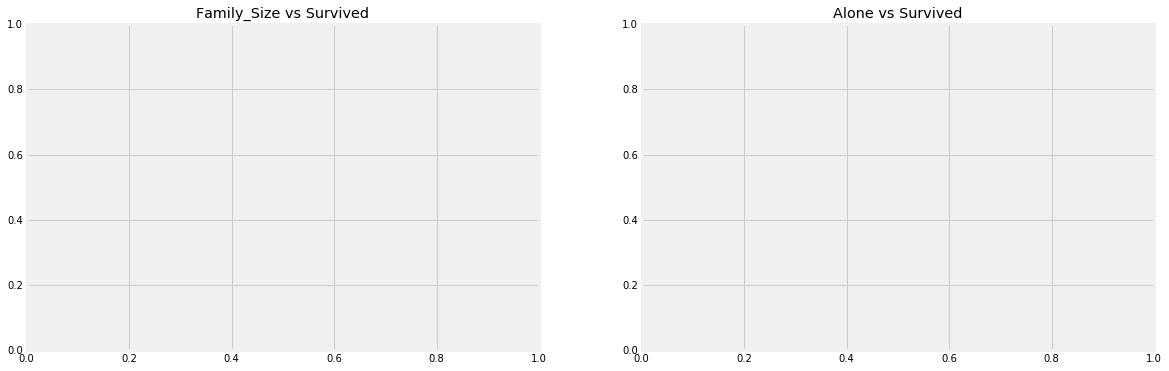

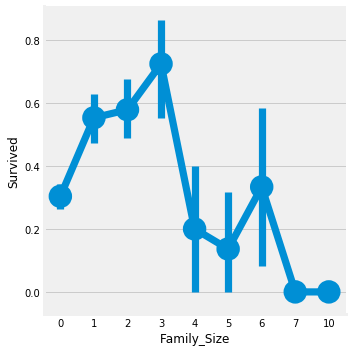

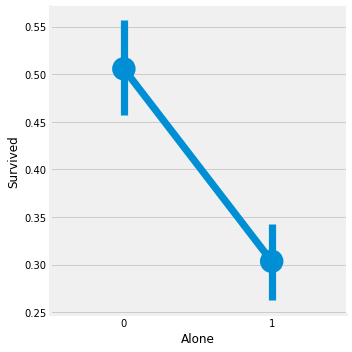

In [39]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']  # family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1  # Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
# plt.close(2)
# plt.close(3)
plt.show()

Family_Size=0 은 승객이 혼자라는 것을 의미한다. 명백하게, 만약 alone이거나 family_size=0이면, 생존 확률은 매우 낮다. family_size>4 이면, 생존 확률도 감소한다. 이것 또한 모델에 중요한 feature가 될 것 같다. 좀 더 알아보자.

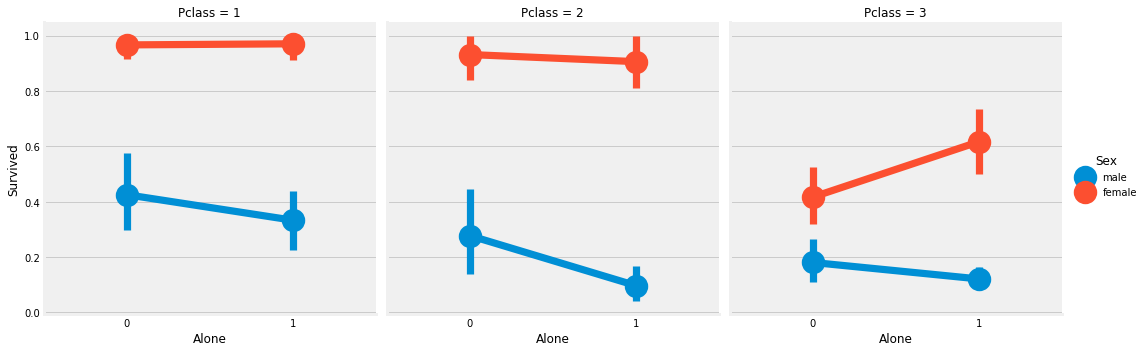

In [40]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

홀로 있는 여성이 더 생존 가능성이 높은 Pclass3을 제외하고, 객실 등급 또는 성별에 관계없이 홀로 있는 것이 위험하다고 보인다.

### Fare_Range

운임요금 또한 연속형 feature이므로, 이를 서수형 변수로 전환시켜야 한다. 이를 위해 pandas.qcut 을 이용한다.

qcut은 우리가 패스한 빈(bin)의 수에 따라 값을 분할하거나 정렬한다. 따라서 만약 5개의 구간을 패스하면 5개의 구간 또는 값 범위에 동일한 간격으로 값이 정렬된다.

In [41]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')
# to_frame() : 주어진 일련의 object를 dataframe으로 전환시킴. 파라미터로 컬럼명 지정 가능. 안 써주면 Survived 로 들어감.

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


위에서 논의한 것처럼, fare_range가 증가함에 따라 생존 가능성이 증가한다는 것을 분명히 알 수 있다.

이제 Fare_Range 값을 그대로 전달할 수 없다. Age_Band에서와 마찬가지로 singleton 값으로 변환해야 한다.

In [42]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31.0),'Fare_cat']=2
data.loc[(data['Fare']>31.0)&(data['Fare']<=512.329),'Fare_cat']=3

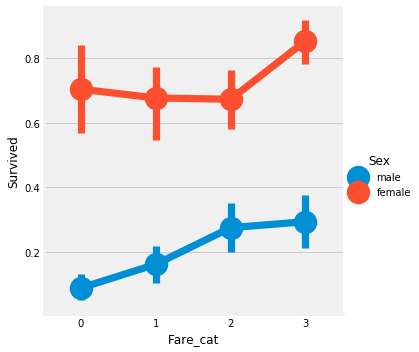

In [43]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

Fare_cat이 증가함에 따라 생존 확률이 증가한다. 이 feature는 성별과 함께 모델링하는 동안 중요한 feature가 될 수 있다.

### 문자열 값을 숫자형으로 전환하기

문자열을 머신 러닝 모델로 전달할 수 없으므로 성별, 승선장 등을 숫자형 값으로 변환해야 한다.

In [44]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

#### **불필요한 feature 삭제**

**Name** → 범주 값으로 변환할 수 없으므로 이름 feature는 필요없다.

**Age** → Age_band feature가 있으므로 더 이상 필요없다.

**Ticket** → 분류 불가한 임의의 문자열이다.

**Fare** → Fare_cat 이 있으므로 필요없다.

**Cabin** → NaN 값이 많이 존재하고, 또한 많은 승객들이 여러 개의 객실을 쓴다. 따라서 이는 쓸모없는 feature이다.

**Fare_Range** → fare_cat 기능이 있다.

**PassengerId** → 분류할 수 없다.

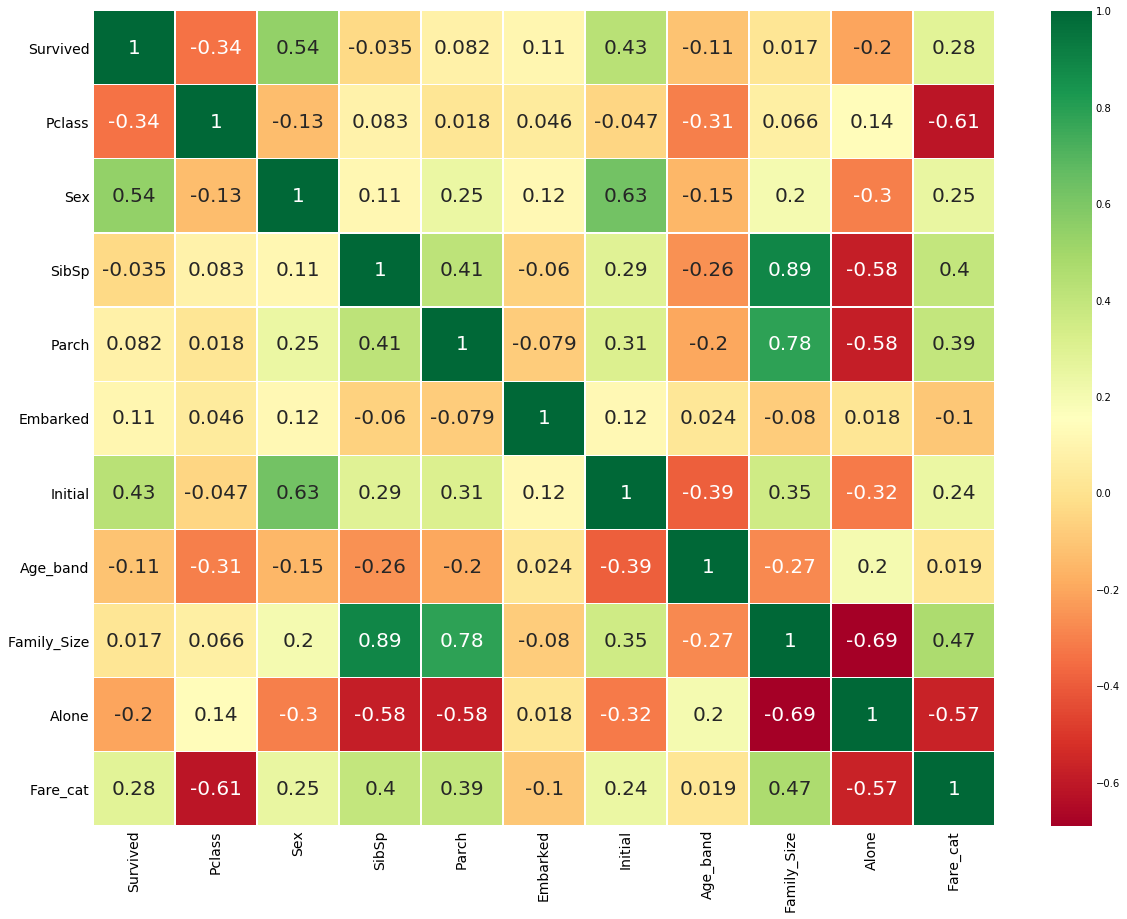

In [45]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

위의 상관 관계 플롯에서 양의 상관관계인 feature들을 몇 개 볼 수 있다. 그 중 일부는 SibSp와 Family_Size, Parch와 Family_Size 이며, 음의 상관관계는 Alone과 Family_Size 가 있다.

## Part3: Predictive Modeling

EDA 파트에서 몇 개의 인사이트를 얻었다. 그러나 이를 갖고 승객의 생존 여부를 정확하게 예측하거나 말할 수는 없다. 따라서 몇 개의 훌륭한 Classification Algorithm을 이용해 승객이 생존할 것인지 아닌지를 예측할 것이다. 아래와 같은 알고리즘들을 모델을 만드는 데에 사용할 것이다.

1) Logistic Regression

2) Support Vector Machines(Linear and radial)

3) Random Forest

4) K-Nearest Neighbours

5) Naive Bayes

6) Decision Tree

7) Logistic Regression

In [46]:
# 필요한 ML 패키지 모두 import하기
from sklearn.linear_model import LogisticRegression  #logistic regression
from sklearn import svm #support vector machine
from sklearn.ensemble import RandomForestClassifier  # Random Forest
from sklearn.neighbors import KNeighborsClassifier   # KNN
from sklearn.naive_bayes import GaussianNB  # Naive bayes
from sklearn.tree import DecisionTreeClassifier  # Decision Tree
from sklearn.model_selection import train_test_split  # training and testing data split
from sklearn import metrics  # accuracy measure
from sklearn.metrics import confusion_matrix  # for confusion matrix

In [47]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

**Radial Support Vector Machines(rbf-SVM)**

In [48]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('rbf SVM의 정확도 :',metrics.accuracy_score(prediction1, test_Y))

rbf SVM의 정확도 : 0.835820895522388


**Linear Support Vector Machine(linear-SVM)**

In [49]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('linear SVM 의 정확도 :', metrics.accuracy_score(prediction2, test_Y))

linear SVM 의 정확도 : 0.8171641791044776


**Logistic Regression**

In [50]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('Logistic Regression 정확도:',metrics.accuracy_score(prediction3,test_Y))

Logistic Regression 정확도: 0.8171641791044776


**Decision Tree**

In [51]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4 = model.predict(test_X)
print('Decision Tree 정확도:',metrics.accuracy_score(prediction4,test_Y))

Decision Tree 정확도: 0.8022388059701493


**K-Nearest Neighbours(KNN)**

In [52]:
model=KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('KNN 정확도:', metrics.accuracy_score(prediction5,test_Y))

KNN 정확도: 0.8283582089552238


n_neighbours 속성 값을 바꾸면 KNN 모델의 정확도가 바뀐다. 디폴트값은 5이다. n_neighbours 의 다양한 값에 대한 정확도를 확인해보자.

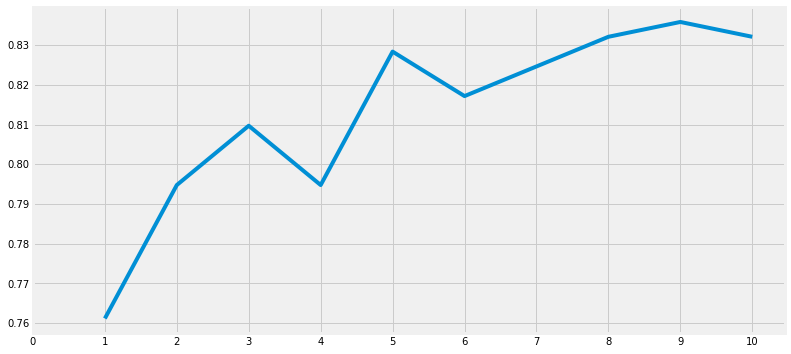

Accuracies for different values of n are: [0.76119403 0.79477612 0.80970149 0.79477612 0.82835821 0.81716418
 0.82462687 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [53]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:', a.values,
'with the max value as ',a.values.max())

**Gaussian Naive Bayes**

In [54]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('NaiveBayes 정확도:', metrics.accuracy_score(prediction6,test_Y))

NaiveBayes 정확도: 0.8134328358208955


**Random Forests**

In [55]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('Random Forests 정확도:', metrics.accuracy_score(prediction7,test_Y))

Random Forests 정확도: 0.8283582089552238


모델의 정확도는 classifier의 강건성을 결정하는 유일한 요인은 아니다. 한 classifier가 training data로 훈련되고 test data로 테스트되고 90% 의 정확도를 보인다고 하자.

이것은 classifier 에 있어서 매우 좋은 정확도를 보이느 것처럼 보이지만, 그 다음에 올 새로운 모든 test set에 대해서도 90% 일 것이라고 확신할 수 있을까? 확신할 수 없다. classifier가 훈련시키는 데 어떤 인스턴스를 사용할 지 결정할 수 없기 때문이다. training과 test 데이터가 변경되면 정확도도 변경된다. 이는 증가 또는 감소할 수 있다. 이것을 모델 분산(model variance)이라고 한다.

이를 극복하고 일반화된 모델을 얻기 위해 Cross Validation 을 이용할 수 있다.

### Cross Validation

데이터가 불균형한 경우가 꽤 있다. 예를 들어, class1 인스턴스는 많지만 다른 클래스 인스턴스는 적을 수 있다. 따라서 데이터셋의 모든 인스턴스에서 알고리즘을 train 및 test 해야 한다. 그 후 데이터셋의 알려진 모든 정확도의 평균을 얻을 수 있다.

1) K-Fold 교차 검증을 하기 위해 데이터셋을 k-subset으로 나눈다.

2) 데이터셋을 (k=5) 파트로 나눈다고 하자. test를 위해 1개 파트는 놔두고 4개 파트를 갖고 알고리즘을 train 한다.

3) 각 iteration에서 testing 파트를 변경하고, 다른 파트에 대해 알고리즘을 training 시키며 프로세스를 진행한다. 이후 정확도와 에러들의 평균을 내어 알고리즘의 평균 정확도를 얻는다.

이것을 K-Fold Cross Validation(K-Fole 교차 검증) 이라고 한다.

4) 알고리즘은 일부 training data의 데이터셋에 적합하지 않을 수 있고, 다른 training set의 데이터에 과적합일 수도 있다. 따라서 교차 검증을 통해 일반화된 모델을 얻을 수 있다.

In [56]:
from sklearn.model_selection import KFold   # for K-fold cross validation
from sklearn.model_selection import cross_val_score  # score evaluation
from sklearn.model_selection import cross_val_predict  # prediction
kfold = KFold(n_splits=10, random_state=22)  # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y,cv = kfold,scoring = 'accuracy')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.791223,0.045646
Radial Svm,0.828290,0.034427
Logistic Regression,0.804719,0.025670
KNN,0.812659,0.041477
Decision Tree,0.812597,0.025908
Naive Bayes,0.799139,0.028757
Random Forest,0.815993,0.037653


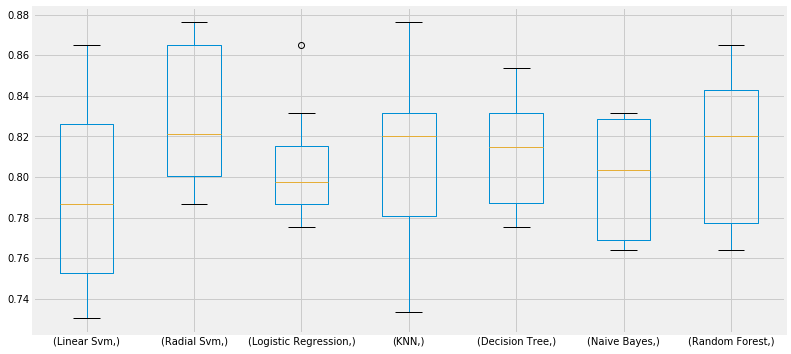

In [57]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()
plt.show()

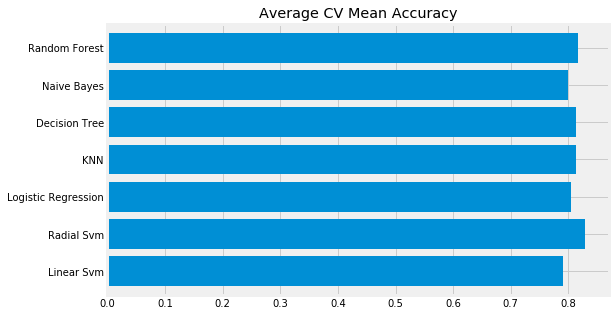

In [58]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

가끔 불균형으로 인해 분류 정확도가 잘못 나올 수도 있다. 모델의 어느 부분이 잘못 되었는지, 모델이 어떤 클래스를 잘못 예측했는지를 보여주는 confusion matrix를 이용하여 요약된 결과를 얻을 수 있다.

### Confusion Matrix

이는 classifier 에 의해 생성된 정확하고 부정확한 분류의 수를 보여준다.

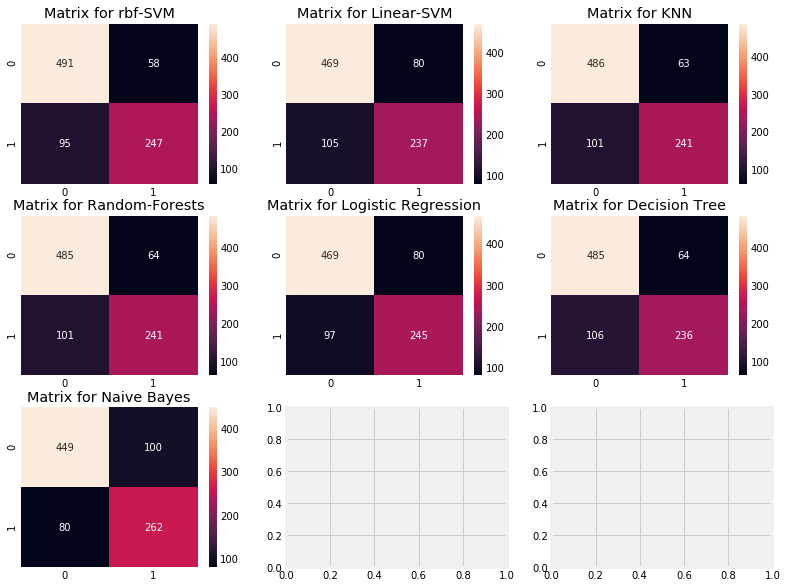

In [59]:
f,ax=plt.subplots(3,3,figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

**Confusion Matrix 해석하기**

왼쪽 대각선은 각 클래스에 대한 올바른 예측 수를 나타내고 오른쪽 대각선은 잘못된 예측 수를 나타낸다. rbf-SVM로 구한 첫 번째 plot을 살펴보자:

1) 정확한 예측값은 491(사망) + 247(생존) 개이며, 평균 CV 정확도는 (491+247)/891 = 82.8% 로, 이전에 얻은 것이다.

2) 오류 --> 58명의 사망자들은 생존자로, 95명의 생존자는 사망자로 잘못 분류되었다. 따라서 생존자를 사망자로 예측한 오류가 더 많다.

모든 행렬을 살펴보면, rbf-SVM은 사망한 승객을 올바르게 예측할 가능성이 높지만 NaiveBayes는 생존한 승객을 올바르게 예측할 가능성이 높다고 할 수 있다.

**Hyper-Parameters Tuning**

머신 러닝 모델은 블랙박스와 유사하다. 이 블랙박스에는 몇 가지 기본 파라미터 값이 있으며, 더 나은 모델을 얻기 위해 이를 튜닝하거나 변경할 수 있다. SVM 모델의 C와 gamma처럼, 이와 유사하게 다른 classifier들에 대한 다른 파라미터를 hyper-parameter라고 부른다. 이는 알고리즘의 learning rate을 변경하고 더 좋은 모델을 얻기 위해 튜닝할 수 있다. 이를 Hyper-Parameter Tuning 이라고 한다.

가장 괜찮은 2개의 classifier인 SVM과 RandomForests 를 이용하여 hyper-parameter들을 튜닝할 것이다.

**SVM**

In [60]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282828282828283
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   13.7s finished


**Random Forests**

In [61]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   30.7s finished


0.8181818181818182
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


rbf-SVM 의 최고 점수는 C=0.05, gamma=0.1일 때 82.82% 이다. RandomForest는 n_estimators=800 일 때 약 81.8% 이다.

## Ensembling

Ensembling 은 모델의 정확도와 성능을 높이는 데 좋은 방법이다. 간단히 말해서, 이것은 하나의 강력한 모델을 만들기 위해 여러 개의 간단한 모델들을 조합하는 것이다.

우리가 폰을 사고 싶고, 많은 사람들에게 이에 대해 다양한 파라미터를 기준으로 질문한다고 해보자. 그러면 우리는 모든 서로 다른 파라미터를 분석한 후 하나의 제품에 대해 확실한 결정을 내릴 수 있을 것이다. 이것이 Ensembling 이다. 이는 모델의 안정성을 향상시킨다. Ensembling은 다음과 같이 수행될 수 있다:

1)Voting Classifier

2)Bagging

3)Boosting.

### Voting Classifier

많은 서로 다른 단순한 머신 러닝 모델들로부터 예측을 조합할 수 있는 가장 간단한 방법이다. 이것은 모든 서브모델의 예측에 기반하여 평균 예측을 낸다. 서브모델이나 기본 모델은 모두 다른 타입이다.

In [62]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                             ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                             ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                             ('LR',LogisticRegression(C=0.05)),
                                             ('DT',DecisionTreeClassifier(random_state=0)),
                                             ('NB',GaussianNB()),
                                             ('svm',svm.SVC(kernel='linear',probability=True))
                                             ],
                                 voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv=10,scoring='accuracy')
print('The cross validated score is', cross.mean())

The accuracy for ensembled model is: 0.8246268656716418
The cross validated score is 0.8237660310974917


### Bagging

Bagging 은 일반적인 앙상블 방법이다. 데이터셋의 작은 파티션에 유사한 classifiers를 적용한 다음 모든 예측의 평균을 취한다. 평균화로 인해, variance가 감소한다. Voting Classifier와 달리, Bagging은 유사한 classifier를 이용한다.

**Bagged KNN**<br>
Bagging은 variance가 높은 모델에 가장 좋다. Decision Tree 또는 Random Forests가 그 예가 될 수 있다. 우리는 n_neighbours의 작은 값으로 KNN을 사용할 수 있다.

In [63]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.835820895522388
The cross validated score for bagged KNN is: 0.8171365338781069


Bagged DecisionTree

In [64]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.832089552238806
The cross validated score for bagged Decision Tree is: 0.8193590398365679


### Boosting<br>
Boosting은 classifiers의 순차적 학습을 이용하는 앙상블 기법이다. 약한 모델을 단계별로 강화한다. Boosting은 다음과 같이 이뤄진다.<br>

먼저 모델은 전체 데이터셋에 대해 학습된다. 이제 모델은 올바른 인스턴스 몇 개와 올바르지 못한 것을 몇 개 갖게 된다. 다음 iteration에서, learner는 잘못 예측된 인스턴스들에 더 집중하거나, 이에 더 많은 가중치를 부여한다. 따라서 이것은 틀린 인스턴스들을 올바르게 예측하고자 할 것이다. 이제 이 반복적인 프로세스는 지속되고, 정확도가 한계에 도달할 때까지 새로운 classifier들은 모델에 추가된다.

**AdaBoost(Adaptive Boosting)**<br>
이런 경우의 약한 learner나 estimator는 Desision Tree 이다. 그러나 우리는 기본 base_estimator를 우리가 선택한 알고리즘으로 바꿀 수 있다.

In [65]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8271873226648507


**Stochastic Gradient Boosting**<br>
여기에서도 weak learner가 Decision Tree 이다.

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8183112019067075


**XGBoost**

In [67]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8204951197366928


AdaBoost에 대한 가장 높은 정확도를 얻었다. 이것을 하이퍼 파라미터 튜닝으로 더 향상시킬 것이다.

**Hyper-Parameter Tuning for AdaBoost**

In [71]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  8.1min finished


0.8316498316498316
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=200, random_state=None)


AdaBoost로 얻을 수 있는 가장 높은 정확도는 n_estimators=200이고 learnint_rate=0.05일 때의 83.16% 이다.

#### 최상의 모델을 위한 Confusion Matrix

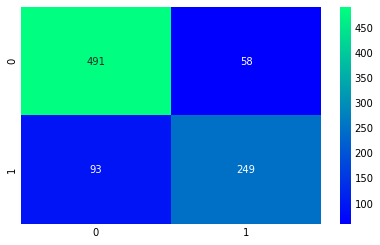

In [69]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

### Feature Importance

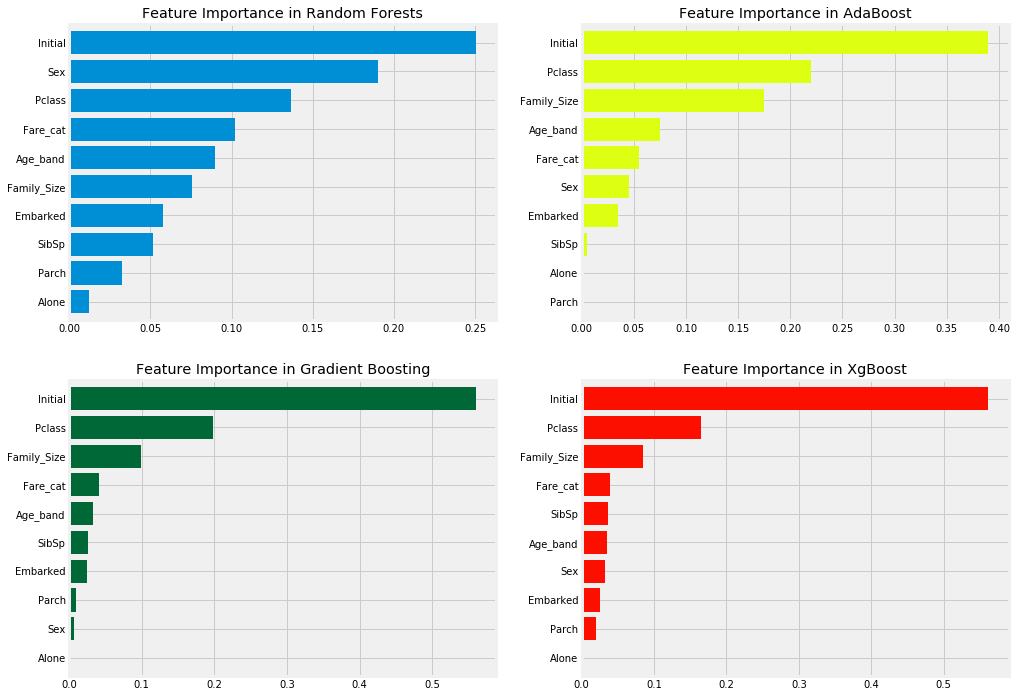

In [70]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

RandomForests, AdaBoost 등과 같은 다양한 classifier들에 대한 중요한 feature들을 알 수 있다.

관찰 결과:

1) 일반적으로 중요한 feature 몇 개는 Initial, Fare_cat, Pclass, Family_Size 이다.

2) 성별 feature는 중요하지 않은 것으로 보인다. Pclass와 조합된 성별이 매우 좋은 차별화 요소를 주는 것을 봤기에 충격적이지만, 성별은 RandomForests에서만 중요한 것처럼 보인다.

그러나, feature Initial은 많은 classifier에서 탑이다. 이미 우리는 성별과 Initial 간 양의 상관관계를 봤고, 따라서 이는 모두 gender를 가리킨다.

3) 유사하게, Pclass와 Fare_cat은 승객들의 지위를, Family_Size는 Alone, Parch, SibSp 를 나타낸다.


